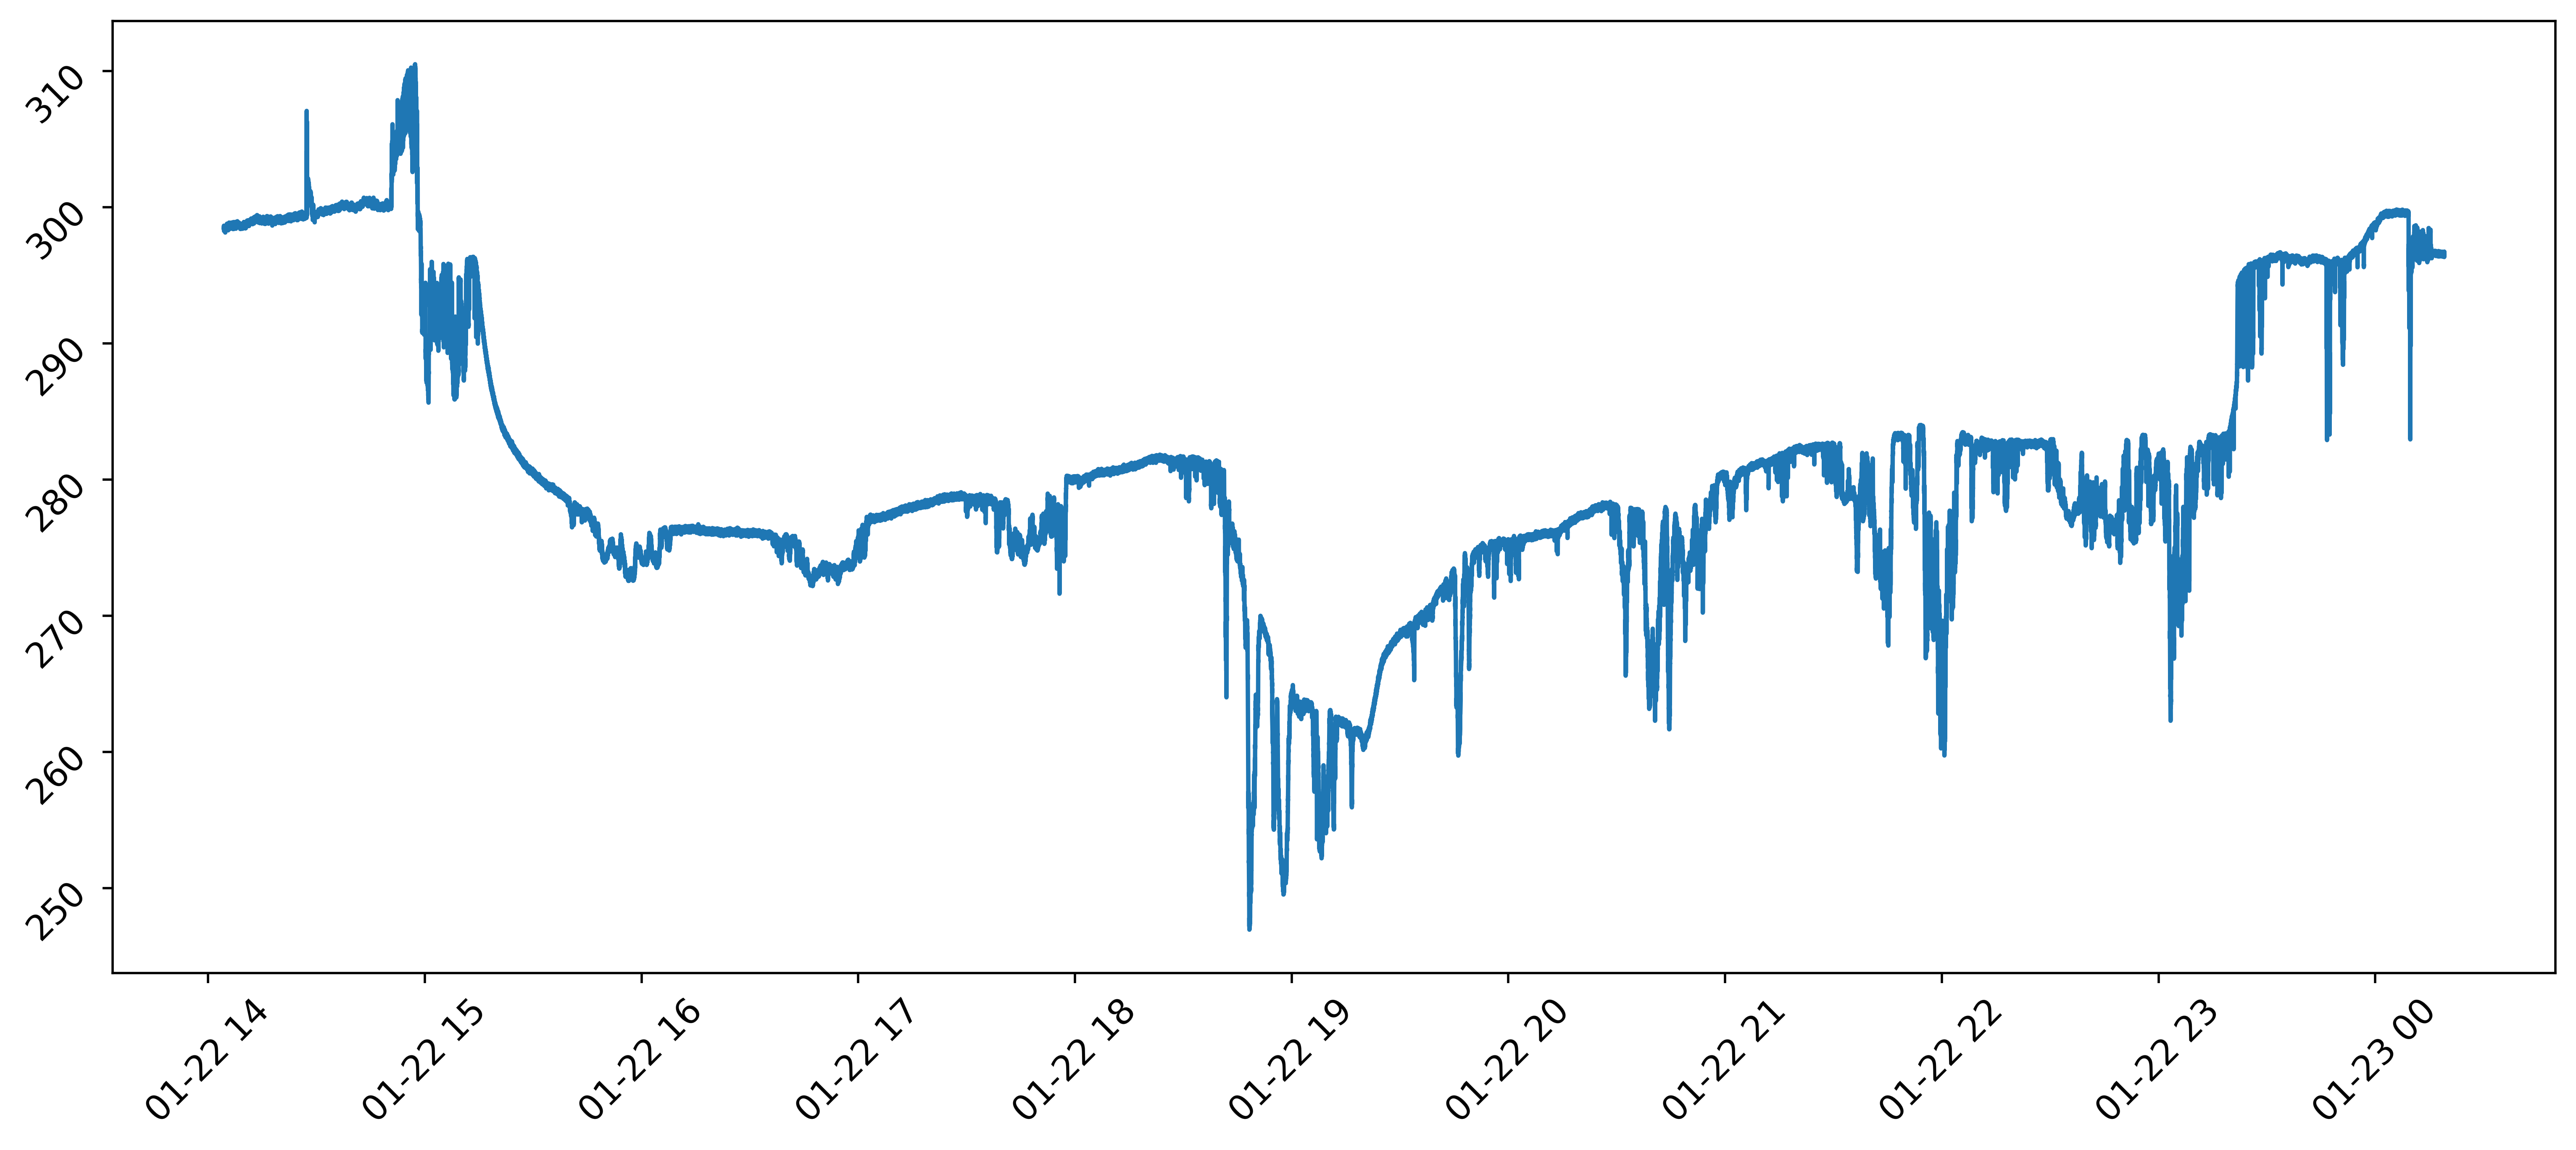

In [5]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
KT19_22_jan = pd.read_csv('KT19_jhamela_22_jan.csv', header=None, delim_whitespace=True)
KT19_22_jan.columns = ['date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
hour = [] 
for i in KT19_22_jan.hours:
    hour.append('{:02}'.format(i))
hour = pd.DataFrame(hour)
KT19_22_jan= pd.concat([hour,KT19_22_jan], axis = 1)
Min = [] 
for i in KT19_22_jan.minutes:
    Min.append('{:02}'.format(i))
Min = pd.DataFrame(Min)
KT19_22_jan= pd.concat([Min,KT19_22_jan], axis = 1)
KT19_22_jan.columns = ['Min','hour','date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
KT19_22_jan['time'] = KT19_22_jan.date.astype(str).str.cat(KT19_22_jan[['hour','Min','seconds']].astype(str))
KT19_22_jan["time"]= KT19_22_jan["time"].astype(str) 
#KT19_22_jan.to_csv('KT19_22_jan.csv')
my_date = []
for m in KT19_22_jan.time:
    date = datetime.strptime(m, "%Y%m%d%H%M%S.%f")
    my_date.append(date)
my_date = pd.DataFrame(my_date)
KT19_22 = pd.concat([my_date,KT19_22_jan.temperature,KT19_22_jan.time], axis = 1)
KT19_22.columns = ['datetime', 'temperature','time']
plt.figure(figsize=(15,6),dpi=500)
plt.plot(KT19_22.datetime,KT19_22.temperature)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.show()
# KT19_22.to_csv('KT19_22.csv')

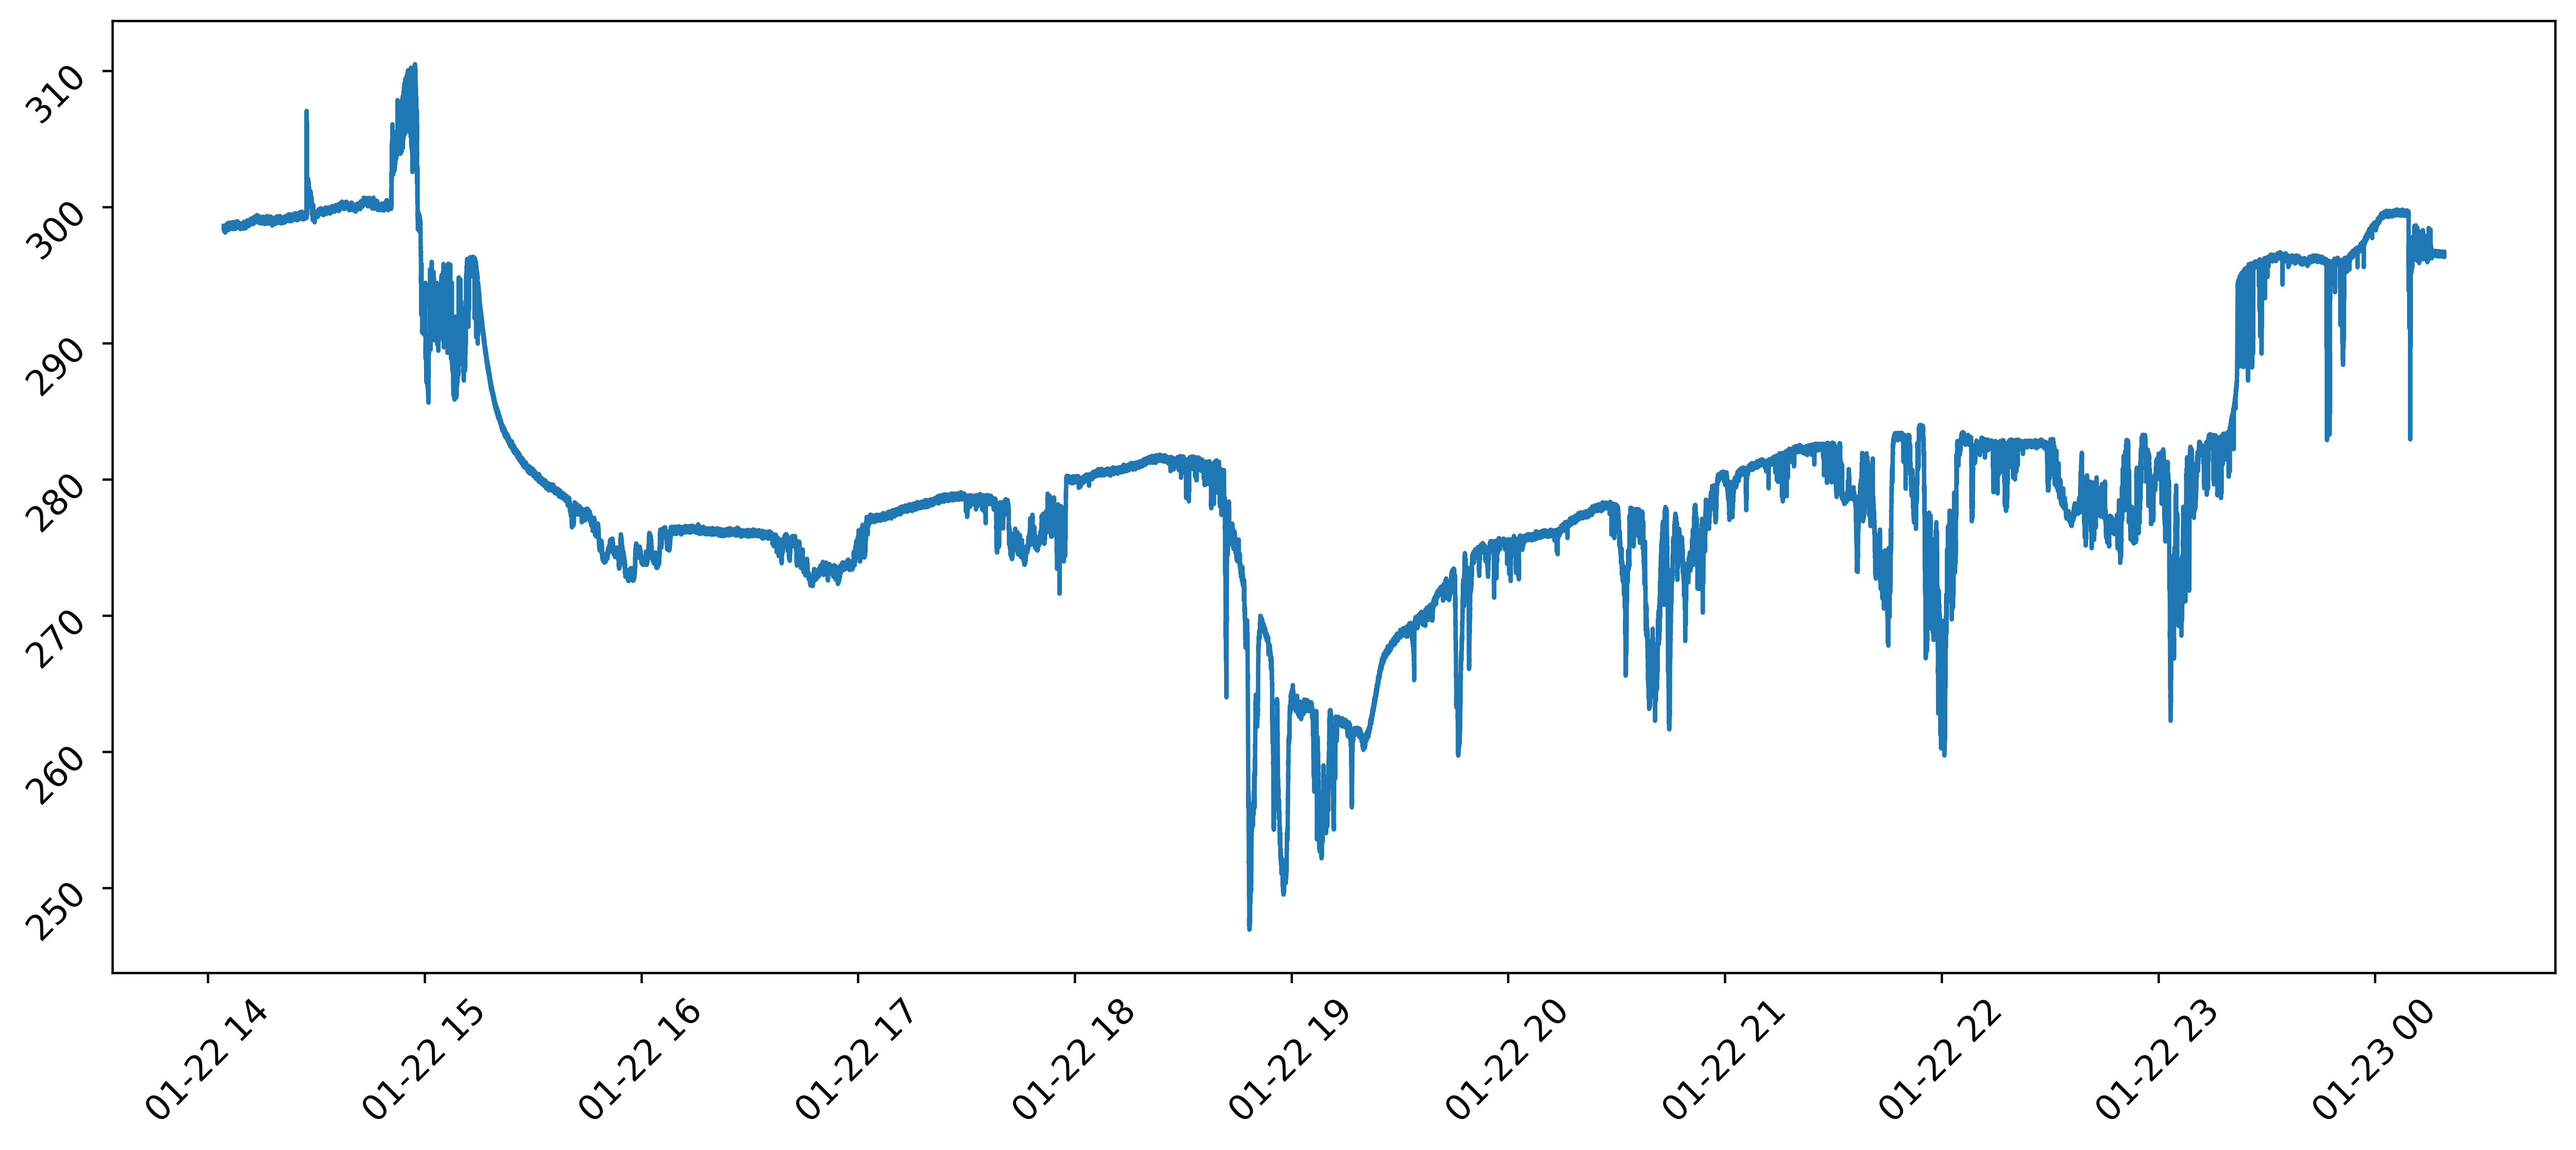

In [6]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
read_files = glob.glob(os.path.join("KT19_20200122_*.dat"))
array = []
for files in read_files:
    data = pd.read_csv(files, header = 0)
    array.append(data)
#    print(files)
merge_values = np.vstack(array)
df_KT19 = pd.DataFrame(merge_values) 
df_KT19.to_csv('data_KT19.csv', header=None,index=False)
KT19_22_jan = pd.read_csv('data_KT19.csv', delim_whitespace=True, header=None)
KT19_22_jan.columns = ['date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
hour = [] 
for i in KT19_22_jan.hours:
    hour.append('{:02}'.format(i))
hour = pd.DataFrame(hour)
KT19_22_jan= pd.concat([hour,KT19_22_jan], axis = 1)
Min = [] 
for i in KT19_22_jan.minutes:
    Min.append('{:02}'.format(i))
Min = pd.DataFrame(Min)
KT19_22_jan= pd.concat([Min,KT19_22_jan], axis = 1)
KT19_22_jan.columns = ['Min','hour','date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
KT19_22_jan['time'] = KT19_22_jan.date.astype(str).str.cat(KT19_22_jan[['hour','Min','seconds']].astype(str))
KT19_22_jan["time"]= KT19_22_jan["time"].astype(str) 
#KT19_22_jan.to_csv('KT19_22_jan.csv')
my_date = []
for m in KT19_22_jan.time:
    date = datetime.strptime(m, "%Y%m%d%H%M%S.%f")
    my_date.append(date)
my_date = pd.DataFrame(my_date)
KT19_22 = pd.concat([my_date,KT19_22_jan.temperature,KT19_22_jan.time], axis = 1)
KT19_22.columns = ['datetime', 'temperature','time']
plt.figure(figsize=(15,6),dpi=500)
plt.plot(KT19_22.datetime,KT19_22.temperature)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.show()

In [1]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]

In [1]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
read_files = glob.glob(os.path.join("Nav_GPSPos000*.Asc"))
array = []
for files in read_files:
    data = pd.read_csv(files, skiprows=9)
    array.append(data)
#    print(files)
merge_values = np.vstack(array)
nav_seconds = pd.DataFrame(merge_values) 
nav_seconds.to_csv('nav_seconds.csv', header=None)
navigation = pd.read_csv('nav_seconds.csv', header = None, delim_whitespace = True)
# navigation.iloc[:,[1,4]]
# navigation_date = pd.concat(navigation,df.loc[:,'date'],axis=1)
# navigation_date
import datetime
start = datetime.datetime(2020, 1, 22, 14, 22, 12)
end = datetime.datetime(2020, 1, 23, 0, 16, 8)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_big = pd.concat([df_time_delta, navigation.iloc[:,4:5]], axis=1)
df_big.dropna(inplace =True)
df_big.columns = ['Time','Altitude']

df_big

,Time,Altitude
0,2020-01-22 14:22:12,14.581
1,2020-01-22 14:22:13,14.642
2,2020-01-22 14:22:14,14.395
3,2020-01-22 14:22:15,13.950
4,2020-01-22 14:22:16,13.318
...,...,...
35632,2020-01-23 00:16:04,1825.230
35633,2020-01-23 00:16:05,1819.817
35634,2020-01-23 00:16:06,1814.532
35635,2020-01-23 00:16:07,1809.202


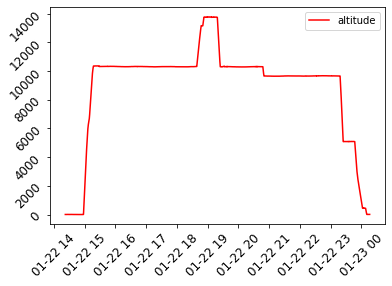

In [58]:
plt.plot(df_big.Time,df_big.Altitude, 'r', label = 'altitude')
#plt.plot(df_big.Time,df_big.Altitude,'b', label = 'altitude')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend()
plt.show()

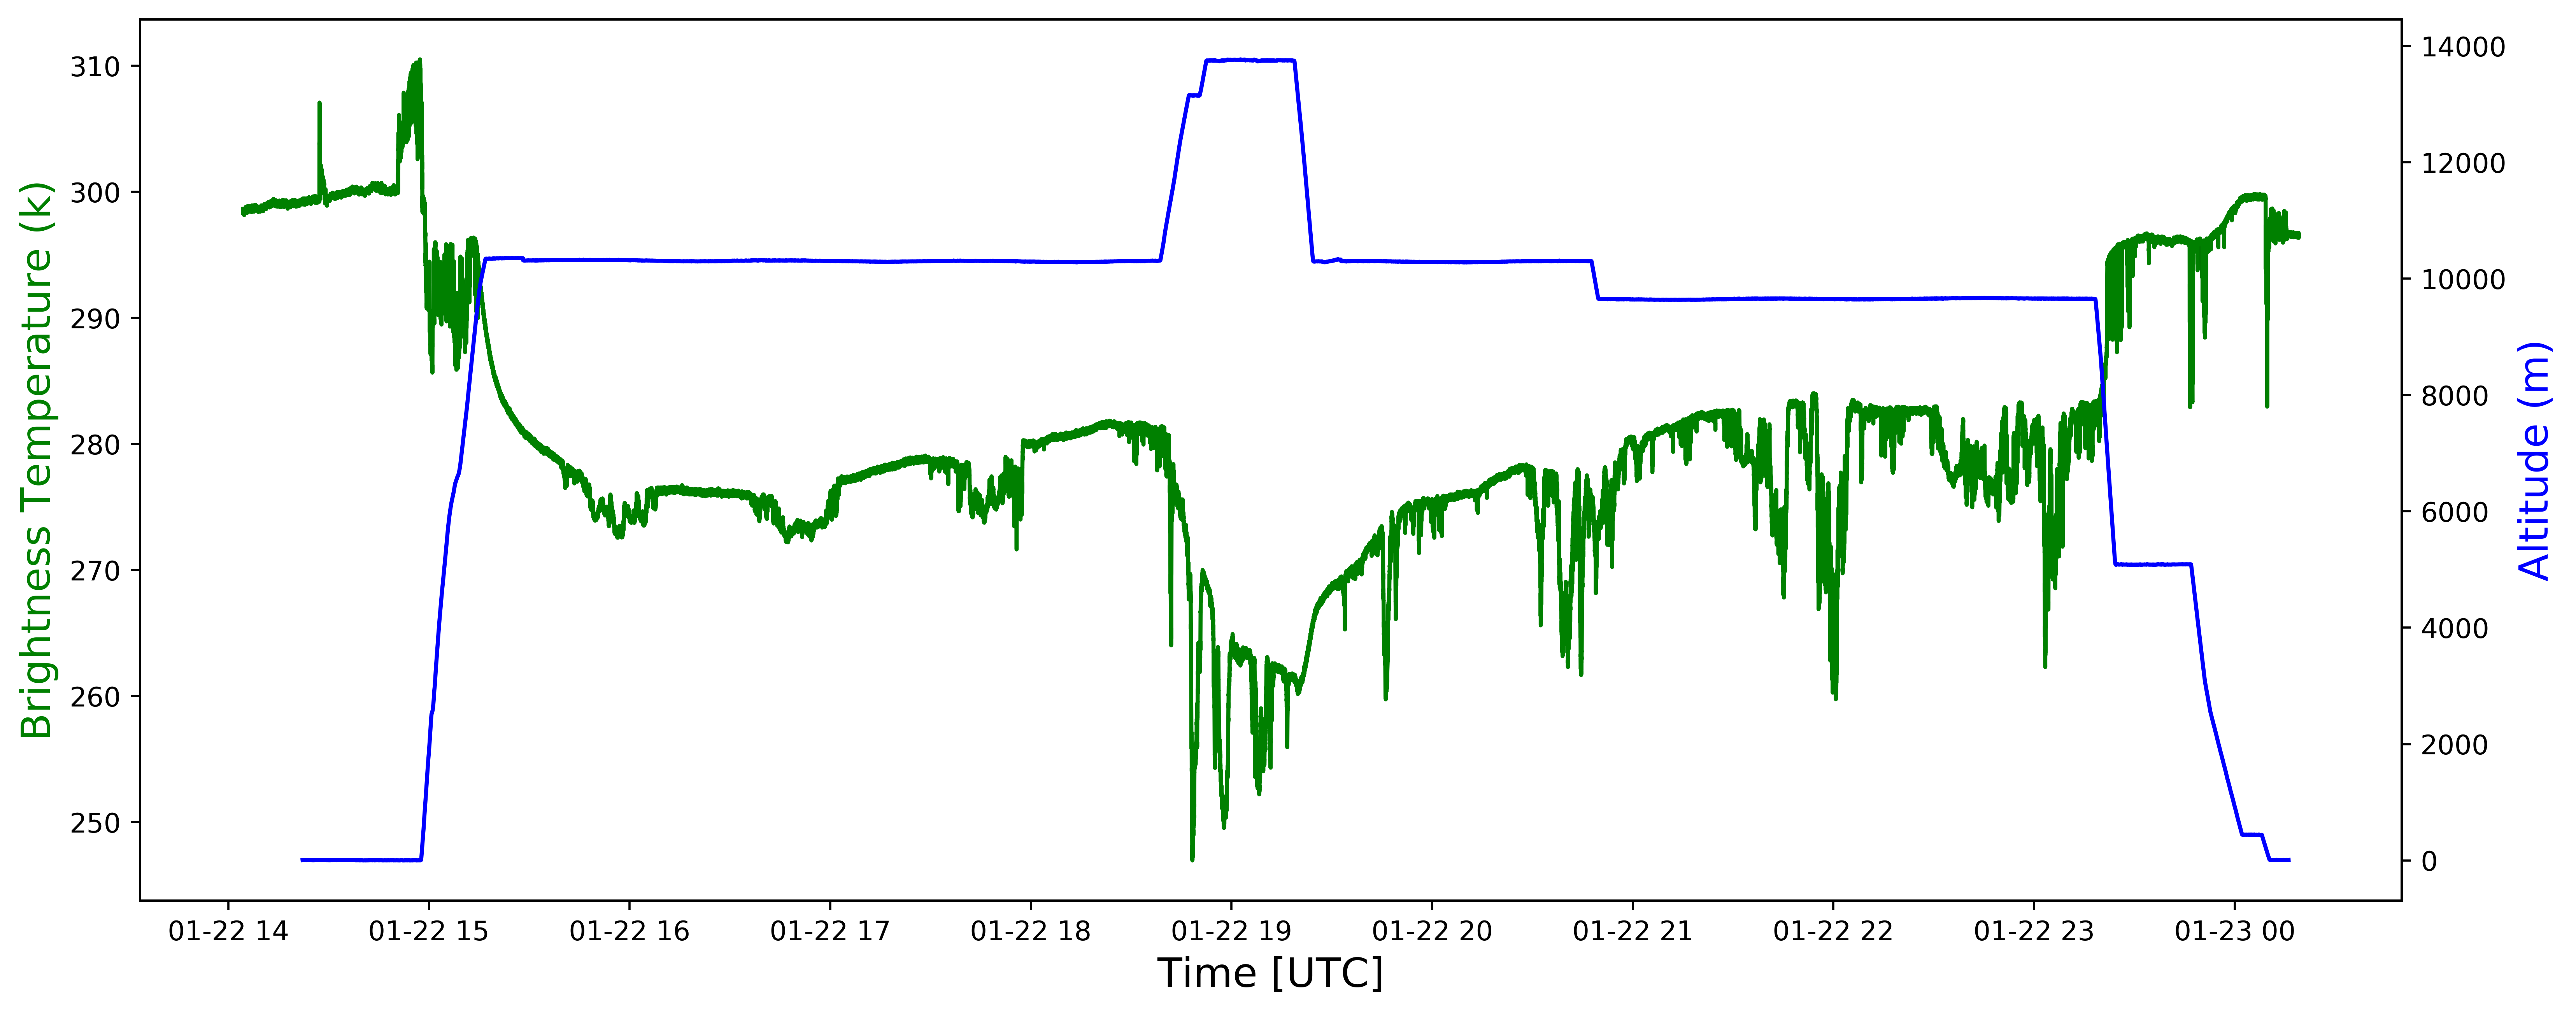

In [116]:
fig, ax1 = plt.subplots(figsize=(15,6),dpi=500)
ax2 = ax1.twinx()
ax1.plot(KT19_22.datetime,KT19_22.temperature, 'g-')
ax2.plot(df_big.Time,df_big.Altitude, 'b-')
ax1.set_xlabel('Time [UTC]',fontsize = 15)
#ax1.set_xticks(fontsize=12, rotation=45)
ax1.set_ylabel('Brightness Temperature (k)', color='g',fontsize = 15)
ax2.set_ylabel('Altitude (m)', color='b',fontsize = 15)

plt.show()

In [72]:
alt_temp = KT19_22.iloc[:,[0,1]]
b = KT19_22_jan['seconds'].astype(str).str.split('.')
seconds = []
for i,j in b:
    seconds.append(i)
second = pd.DataFrame(seconds)
second.columns=['second']
second.reset_index(drop=True)
df = pd.concat([KT19_22_jan,second],axis=1)
df['time'] = df.date.astype(str).str.cat(df[['hours','minutes','second']].astype(str))
#df['time']= pd.to_datetime(df['time'], format='%Y%m%d%H%M%S')
#df1 = df['time'].drop_duplicates()
#df.drop_duplicates()
#a = df.groupby('time').mean().reset_index()
#a
#df1.reset_index(drop=True)
#df1 = pd.DataFrame(df1)
df.head()

,Min,hour,date,hours,minutes,seconds,temperature,calibration_factor_1,calibration_factor_2,instrument_temp,time,second
0,04,14,20200122,14,4,21.32,298.64,1.0,0.3,-999.9,2020012214421,21
1,04,14,20200122,14,4,21.42,298.63,1.0,0.3,-999.9,2020012214421,21
2,04,14,20200122,14,4,21.52,298.52,1.0,0.3,-999.9,2020012214421,21
3,04,14,20200122,14,4,21.67,298.47,1.0,0.3,-999.9,2020012214421,21
4,04,14,20200122,14,4,21.82,298.51,1.0,0.3,-999.9,2020012214421,21


In [91]:
import re
a = []
for i in KT19_22.datetime:
    x = i.strftime("%Y-%m-%d %H:%M:%S")
    a.append(x)
d = pd.DataFrame(a)
d.columns=['Time']
d.reset_index(drop=True)
df = pd.concat([KT19_22,d],axis=1)
KT= df.groupby('Time')['temperature'].mean()


In [95]:
df_big.to_csv('df_big.csv')

In [94]:
KT.to_csv('KT.csv')

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [67]:
KT19_22.time

0         20200122140421.32
1         20200122140421.42
2         20200122140421.52
3         20200122140421.67
4         20200122140421.82
                ...        
299977     2020012300198.43
299978     2020012300198.63
299979     2020012300198.73
299980     2020012300198.83
299981     2020012300198.93
Name: time, Length: 299982, dtype: object

In [96]:
alt = pd.read_csv('df_big.csv', header = None, names = ['datetime','altitude'])
temp = pd.read_csv('KT.csv', header = None, names = ['datetime','temperature'])


In [97]:
alt

,datetime,altitude
0,2020-01-22 14:22:12,4.457
1,2020-01-22 14:22:13,4.502
2,2020-01-22 14:22:14,4.498
3,2020-01-22 14:22:15,4.431
4,2020-01-22 14:22:16,4.635
...,...,...
35630,2020-01-23 00:16:02,9.680
35631,2020-01-23 00:16:03,9.472
35632,2020-01-23 00:16:04,9.561
35633,2020-01-23 00:16:05,9.560


In [98]:
temp

,datetime,temperature
0,2020-01-22 14:22:12,299.307778
1,2020-01-22 14:22:13,299.334444
2,2020-01-22 14:22:14,299.342222
3,2020-01-22 14:22:15,299.306667
4,2020-01-22 14:22:16,299.307778
...,...,...
35630,2020-01-23 00:16:02,296.577500
35631,2020-01-23 00:16:03,296.571111
35632,2020-01-23 00:16:04,296.627778
35633,2020-01-23 00:16:05,296.628750


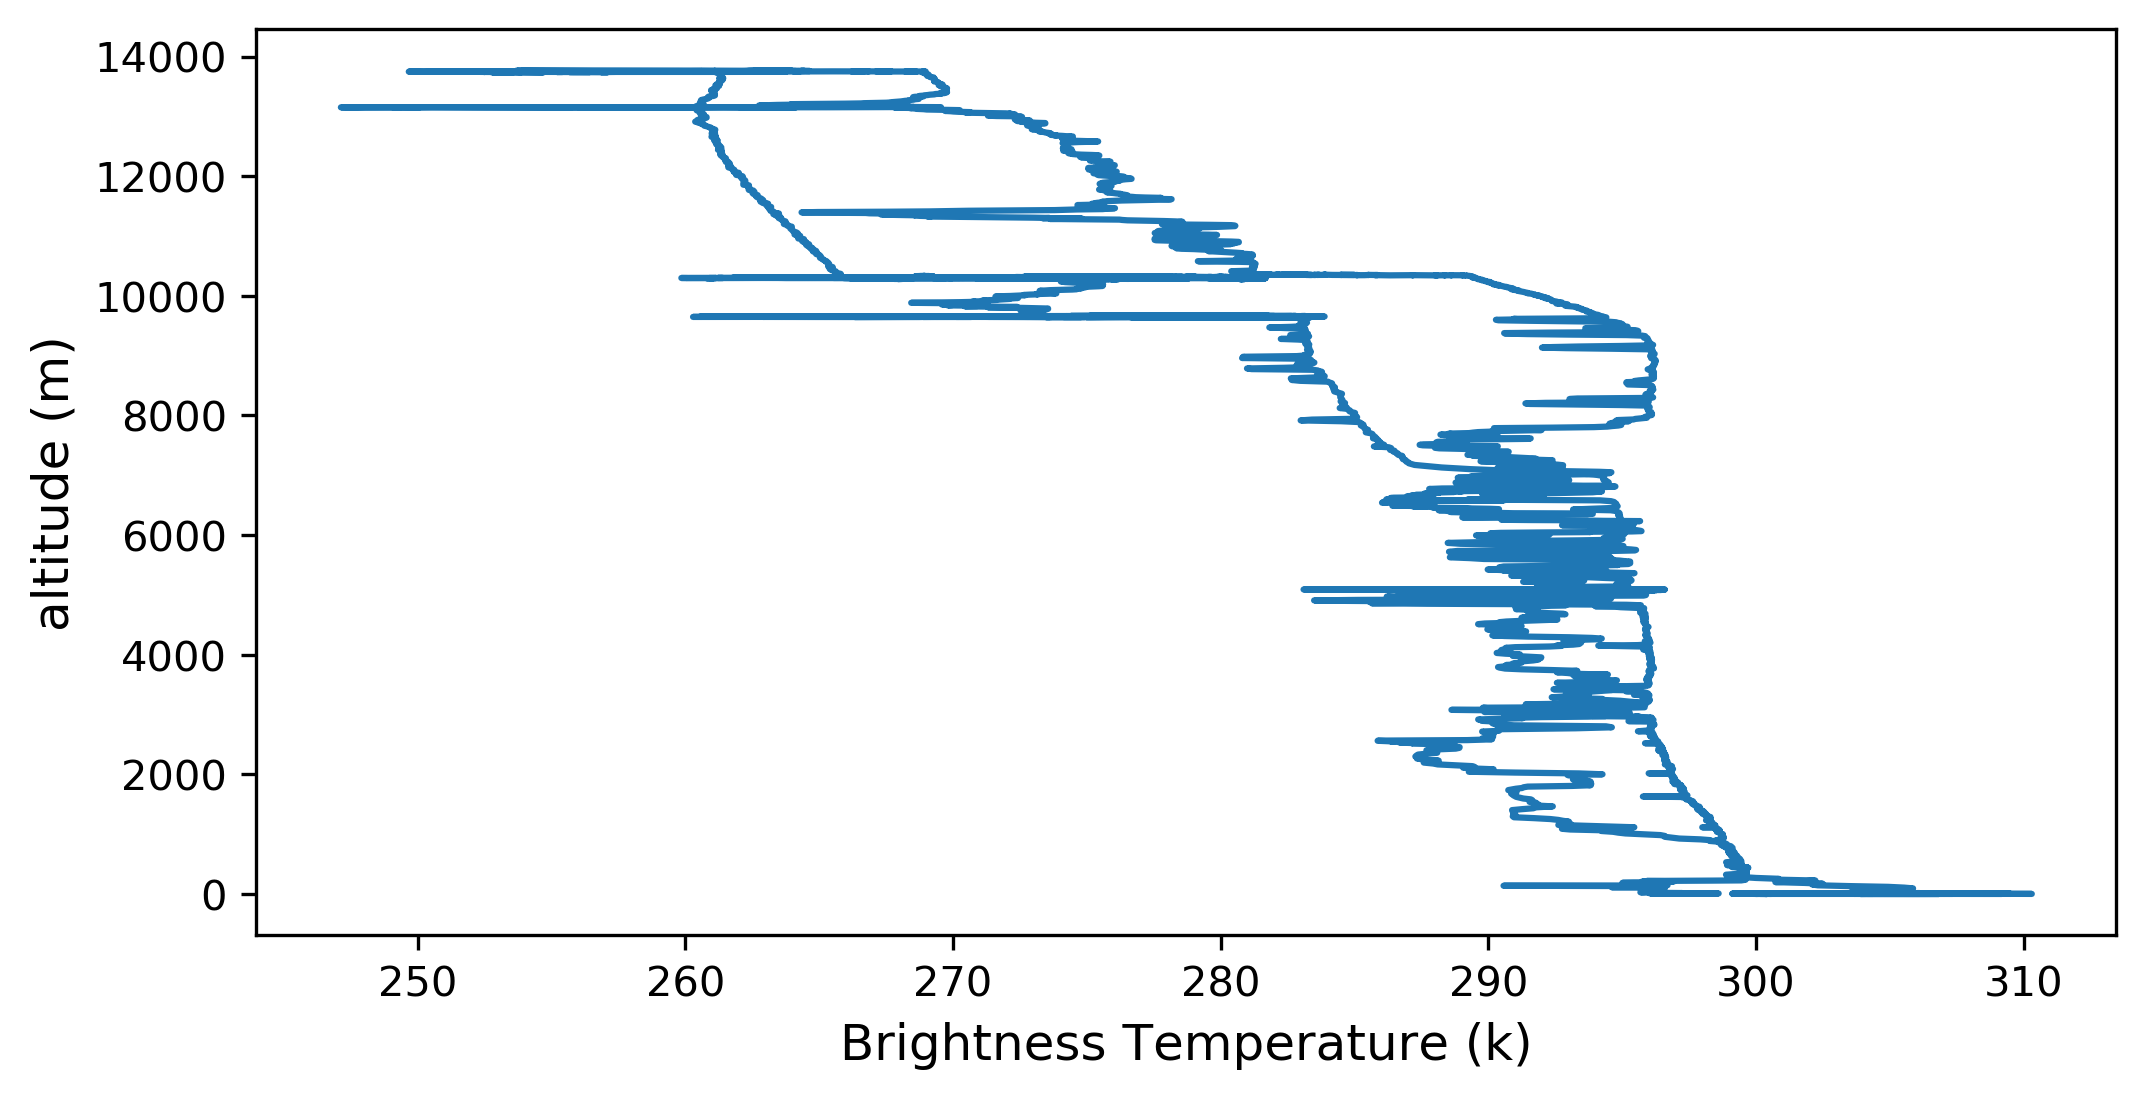

In [111]:
fig, ax1 = plt.subplots(figsize=(8,4),dpi=300)
plt.plot(temp.temperature, alt.altitude)
plt.ylabel ('altitude (m)', fontsize = 12)
plt.xlabel('Brightness Temperature (k)', fontsize = 12)
plt.show()

In [3]:
KT19_22_jan

,Min,hour,date,hours,minutes,seconds,temperature,calibration_factor_1,calibration_factor_2,instrument_temp,time
0,04,14,20200122,14,4,20.42,298.51,1.0,0.3,-999.9,20200122140420.42
1,04,14,20200122,14,4,21.32,298.64,1.0,0.3,-999.9,20200122140421.32
2,04,14,20200122,14,4,21.42,298.63,1.0,0.3,-999.9,20200122140421.42
3,04,14,20200122,14,4,21.52,298.52,1.0,0.3,-999.9,20200122140421.52
4,04,14,20200122,14,4,21.67,298.47,1.0,0.3,-999.9,20200122140421.67
...,...,...,...,...,...,...,...,...,...,...,...
299988,19,00,20200123,0,19,8.43,296.62,1.0,0.3,-999.9,2020012300198.43
299989,19,00,20200123,0,19,8.63,296.43,1.0,0.3,-999.9,2020012300198.63
299990,19,00,20200123,0,19,8.73,296.43,1.0,0.3,-999.9,2020012300198.73
299991,19,00,20200123,0,19,8.83,296.39,1.0,0.3,-999.9,2020012300198.83
